# Análise de Microdados Enade 2018

### Pacotes utilizados

In [2]:
import pandas as pd # pacote para manipulação da base

### Importação dos dados

In [120]:
path = 'D:/UFPR/2º Semestre 2021/Estatística Econômica e Introdução à Econometria/1. Relatório Enade/2018/3.DADOS/microdados_enade_2018.txt'
microdados_enade = pd.read_table(path, sep=';', decimal=',')

In [5]:
microdados_enade.shape #dimensões do dataframe

(548127, 137)

### Analisando a Base

1) Quantos Alunos e IES são representados?

In [14]:
coluna_IES = microdados_enade.filter(['CO_IES'])

In [16]:
coluna_IES['CO_IES'].nunique() # quantidade de IES representadas no Enade

1762

In [17]:
coluna_inscricao = microdados_enade.filter(['TP_INCRICAO'])

In [23]:
len(coluna_inscricao) #Quantidade de alunos representados na pesquisa do Enade

548127

2) Quantos cursos de economia existem no país?

In [40]:
colunas_grupo_curso = microdados_enade.filter(['CO_GRUPO', 'CO_CURSO']) #seleciono somente a coluna do grupo e código do curso.

In [41]:
colunas_grupo_curso[colunas_grupo_curso['CO_GRUPO'] == 13].nunique() #Quantidade de cursos de economia no Brasil (grupo 13)

CO_GRUPO        1
CO_CURSO      195
CO_CATEGAD     14
dtype: int64

3) Quantos são públicos e quantos são privados?

In [49]:
colunas_grupo_curso_categoria = microdados_enade.filter(['CO_GRUPO', 'CO_CURSO', 'CO_CATEGAD']).drop_duplicates()

In [64]:
colunas_grupo_curso_categoria.where(colunas_grupo_curso_categoria.CO_GRUPO == 13).groupby(['CO_CATEGAD']).count()
#Quantidade cursos de economia por categoria de ensino

,CO_GRUPO,CO_CURSO
CO_CATEGAD,,
93.0,9,9
115.0,17,17
116.0,3,3
118.0,9,9
120.0,1,1
121.0,5,5
10001.0,15,15
10002.0,53,53
10003.0,3,3


3) Quantos são diurnos, noturnos e integrais?

In [65]:
colunas_grupo_curso_turno = microdados_enade.filter(['CO_GRUPO', 'CO_CURSO', 'CO_TURNO_GRADUACAO']).drop_duplicates()

In [88]:
colunas_grupo_curso_turno.where(colunas_grupo_curso_turno.CO_GRUPO == 13).groupby(['CO_TURNO_GRADUACAO']).count()
#quantidade de cursos de economia por turno

,CO_GRUPO,CO_CURSO
CO_TURNO_GRADUACAO,,
1.0,43,43
2.0,8,8
3.0,37,37
4.0,164,164


4) Quantos são presenciais e quantos são à distância?

In [87]:
colunas_grupo_curso_modalidade = microdados_enade.filter(['CO_GRUPO', 'CO_CURSO', 'CO_MODALIDADE']).drop_duplicates()

In [86]:
colunas_grupo_curso_modalidade.where(colunas_grupo_curso_modalidade.CO_GRUPO == 13).groupby(['CO_MODALIDADE']).count()
#Quantidade de cursos de economia por modalidade de ensino

,CO_GRUPO,CO_CURSO
CO_MODALIDADE,,
1.0,187,187
2.0,8,8


In [125]:
colunas_grupo_curso_nota = microdados_enade.filter(['CO_GRUPO', 'CO_CURSO', 'NT_GER'])

In [129]:
media_geral_economia = colunas_grupo_curso_nota.where(colunas_grupo_curso_nota.CO_GRUPO == 13).groupby(['CO_CURSO']).mean()

array([[<AxesSubplot:title={'center':'CO_GRUPO'}>,
        <AxesSubplot:title={'center':'NT_GER'}>]], dtype=object)

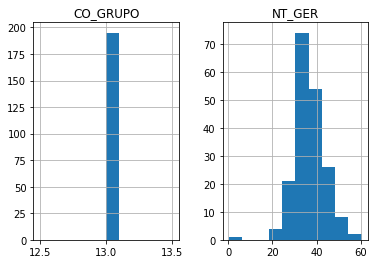

In [130]:
media_geral_economia.hist()

In [131]:
import matplotlib.pyplot as plt
import numpy as np